In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
soccer_df = pd.read_csv('./spi_matches.csv')

In [3]:
soccer_df.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05


In [4]:
soccer_df.describe()

,league_id,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
count,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,32264.000000,21950.000000,21950.000000,26160.000000,26160.000000,14335.000000,14335.000000,14335.000000,14335.000000,14335.000000,14335.000000
mean,2135.269836,45.063587,45.012808,0.452489,0.294291,0.253220,1.527883,1.155568,31.126852,30.400100,1.532875,1.170031,1.499401,1.150133,1.416620,1.130272,1.549263,1.175981
std,707.363165,19.014775,19.001301,0.158496,0.142500,0.047425,0.429377,0.422366,25.963191,25.578376,1.282638,1.134546,0.826357,0.721491,0.650856,0.569210,1.250619,1.122141
min,1818.000000,3.880000,4.040000,0.027100,0.003200,0.000000,0.250000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1849.000000,31.250000,31.240000,0.352475,0.201400,0.235000,1.250000,0.890000,10.800000,10.300000,1.000000,0.000000,0.880000,0.610000,0.960000,0.730000,1.050000,0.000000
50%,1871.000000,43.010000,42.890000,0.444100,0.278600,0.261100,1.460000,1.110000,25.900000,25.100000,1.000000,1.000000,1.370000,1.020000,1.320000,1.040000,1.050000,1.050000
75%,2160.000000,58.470000,58.340000,0.541725,0.368025,0.282300,1.730000,1.370000,45.100000,44.200000,2.000000,2.000000,1.970000,1.540000,1.760000,1.430000,2.100000,2.100000
max,5641.000000,96.570000,96.780000,0.977500,0.899200,0.453700,4.900000,4.060000,100.000000,100.000000,10.000000,8.000000,7.070000,6.200000,6.580000,5.920000,9.150000,7.930000


#### Previously we did not know what nsxg1 and nsxg2 columns would do. Then let's see if using data visualizations we can figure out why they are there.

#### However, first let's convert the date column to an appropriate datetime format

In [5]:
soccer_df.date = pd.to_datetime(soccer_df.date)

In [6]:
soccer_df.dtypes

date           datetime64[ns]
league_id               int64
league                 object
team1                  object
team2                  object
spi1                  float64
spi2                  float64
prob1                 float64
prob2                 float64
probtie               float64
proj_score1           float64
proj_score2           float64
importance1           float64
importance2           float64
score1                float64
score2                float64
xg1                   float64
xg2                   float64
nsxg1                 float64
nsxg2                 float64
adj_score1            float64
adj_score2            float64
dtype: object

/Users/giordannocastro/anaconda2/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


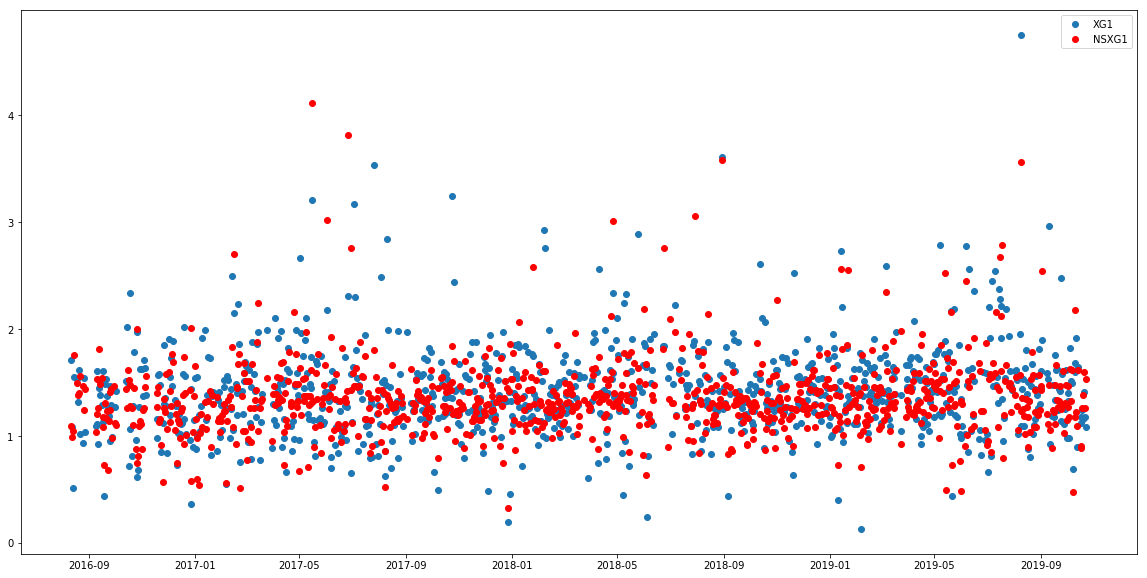

In [7]:
bydate_df = soccer_df.resample('D', on='date').median().reset_index()
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.plot_date(bydate_df.date, bydate_df.xg1,label="XG1")
ax.plot_date(bydate_df.date, bydate_df.nsxg1, label="NSXG1", c='r')
ax.legend()

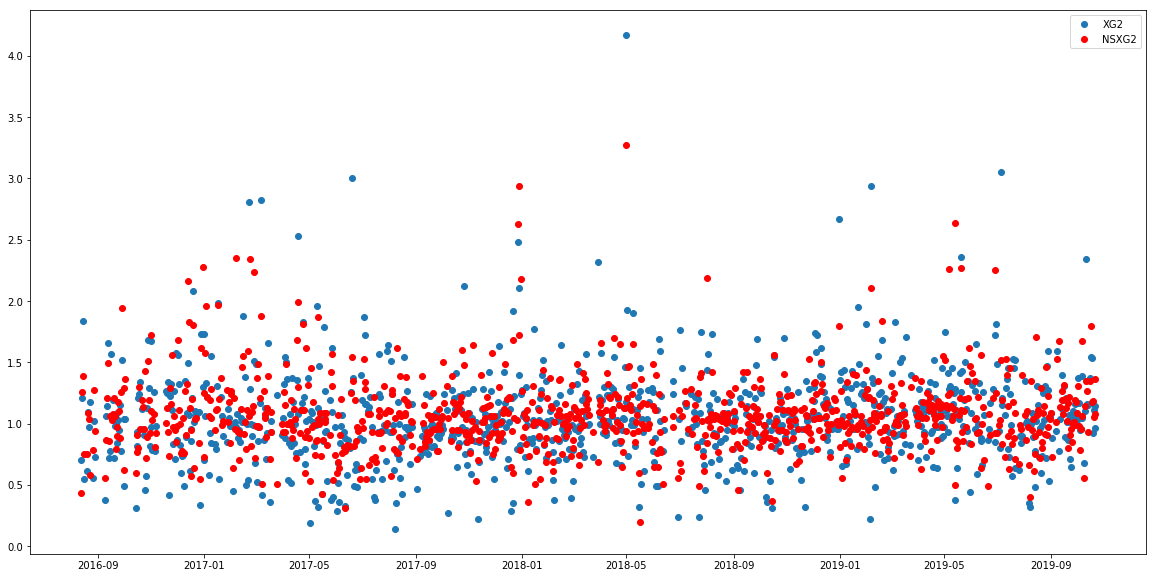

In [8]:
bydate_df = soccer_df.resample('D', on='date').median().reset_index()
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.plot_date(bydate_df.date, bydate_df.xg2,label="XG2")
ax.plot_date(bydate_df.date, bydate_df.nsxg2, label="NSXG2", c='r')
ax.legend()

#### In any sport there is always the idea that the team that plays at home has higher chances of winning the game. Let's see if we can see that using data visualization.

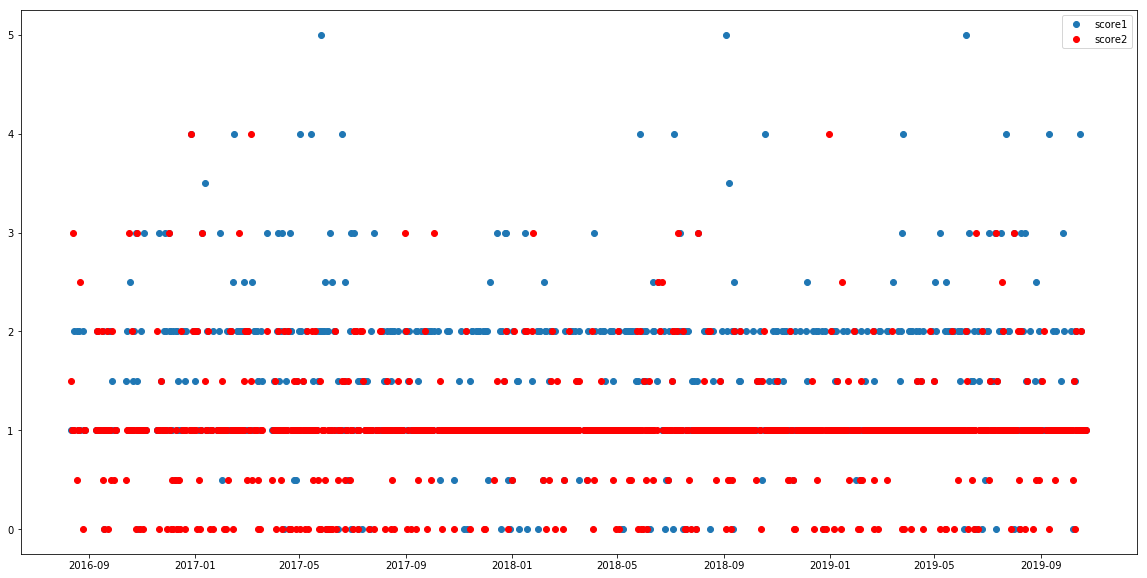

In [16]:
bydate_df = soccer_df.resample('D', on='date').median().reset_index()
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.plot_date(bydate_df.date, bydate_df.score1,label="score1")
ax.plot_date(bydate_df.date, bydate_df.score2, label="score2", c='r')
ax.legend()

#### It is difficult to see any kind of information from this plot. Let's group the data by dates and get the average

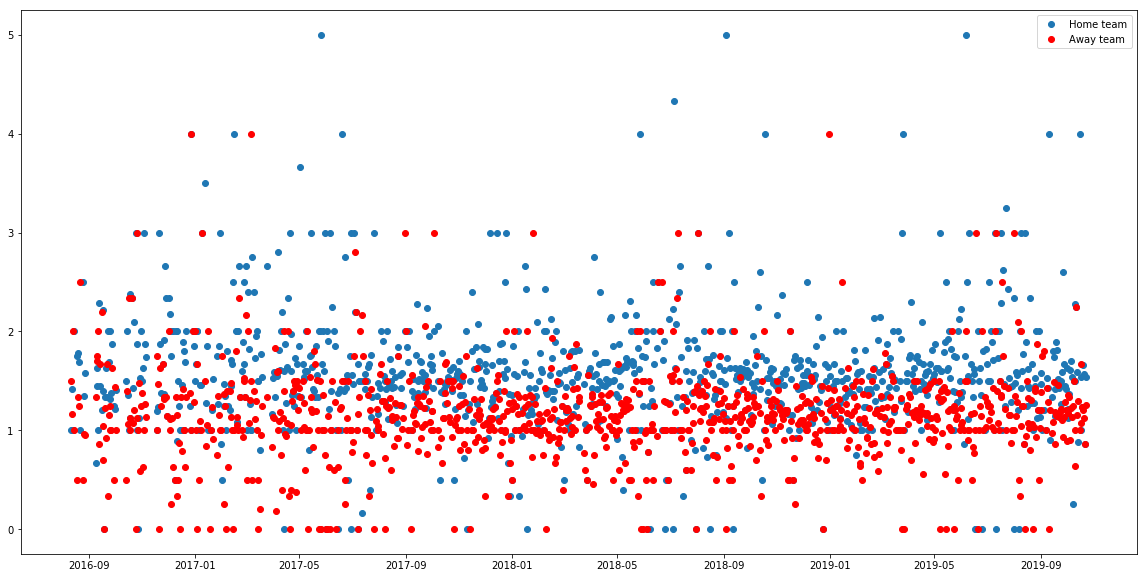

In [18]:
bydate_df = soccer_df.resample('D', on='date').mean().reset_index()
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.plot_date(bydate_df.date, bydate_df.score1,label="Home team")
ax.plot_date(bydate_df.date, bydate_df.score2, label="Away team", c='r')
ax.legend()

#### From this graph we can see that the score for the home team is higher. However, let's see if we can choose a graph that better illustrates this.

#### For this new graph lets group the data by score1 and score2.

In [24]:
score_avg= soccer_df[['score1','score2']].mean()

Text(0.5, 1.0, 'Average of Scores')

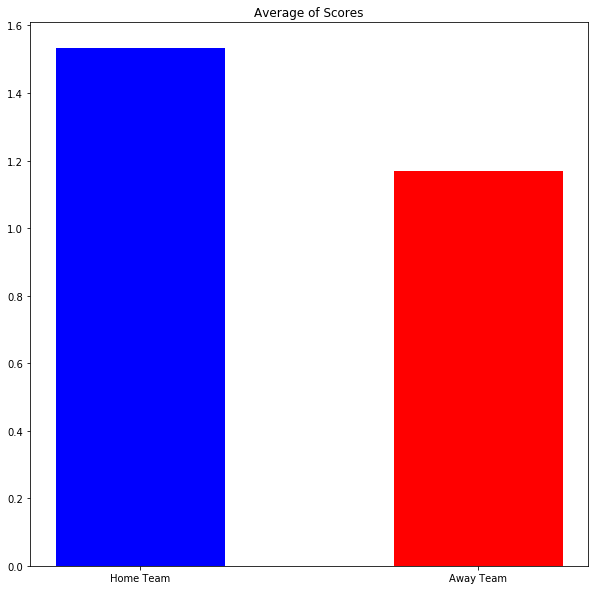

In [38]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.bar(np.arange(len(score_avg)),score_avg,width=0.5,color=['b','r'])
ax.set_xticks(np.arange(len(score_avg)))
ax.set_xticklabels(['Home Team','Away Team'])
ax.set_title('Average of Scores')

#### From the previous graph we can see that the home team usually scores higher than the away team. Now let's see if this is reflected in the percentage of games won by the home team

In [60]:
ties_df = soccer_df[soccer_df.score1 == soccer_df.score2]
noties_df = soccer_df.drop(ties_df.index)
wins = np.where(noties_df.score1 > noties_df.score2, True, False)
home_wins = np.count_nonzero(wins)
home_loses = len(wins)-home_wins
ties = len(ties_df)

Text(0.5, 1.0, 'Comparison of Wins')

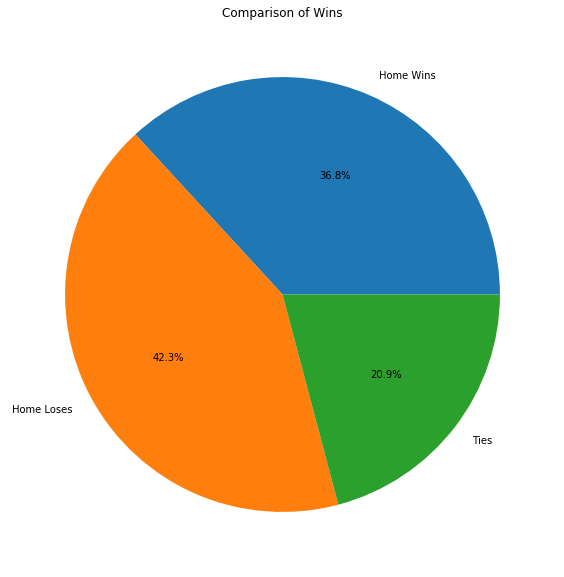

In [61]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.pie([home_wins,home_loses, ties],labels=['Home Wins','Home Loses','Ties'],autopct='%1.1f%%')
ax.set_title('Comparison of Wins')

#### Surprisingly according to this graph the percentage of time that the home wins is 36% compared to the the 42% they lose. So according to this graph there is not a significal advantage for teams playing at home. However, this graph includes information for all the leagues, both good and bad. Maybe if we focus on a highly competitive league such as the Premier League, this difference becomes more obvious.

In [62]:
soccer_df.league.unique()

array(['French Ligue 1', 'Barclays Premier League',
       'Spanish Primera Division', 'Italy Serie A', 'German Bundesliga',
       'UEFA Champions League',
       'Mexican Primera Division Torneo Clausura', 'Major League Soccer',
       'Swedish Allsvenskan', 'Norwegian Tippeligaen',
       "National Women's Soccer League", 'Brasileiro Série A',
       'Russian Premier Liga', 'Mexican Primera Division Torneo Apertura',
       'Austrian T-Mobile Bundesliga', 'Swiss Raiffeisen Super League',
       'French Ligue 2', 'German 2. Bundesliga',
       'English League Championship', 'Scottish Premiership',
       'Portuguese Liga', 'Dutch Eredivisie',
       'Turkish Turkcell Super Lig', 'Spanish Segunda Division',
       'Italy Serie B', 'Argentina Primera Division',
       'UEFA Europa League', 'United Soccer League', 'Danish SAS-Ligaen',
       'Belgian Jupiler League', 'Chinese Super League',
       'Japanese J League', 'English League One',
       'South African ABSA Premier League', 'En

In [68]:
premier_df = soccer_df[soccer_df.league == 'Barclays Premier League']
ties_df = premier_df[premier_df.score1 == premier_df.score2]
noties_df = premier_df.drop(ties_df.index)
wins = np.where(noties_df.score1 > noties_df.score2, True, False)
home_wins = np.count_nonzero(wins)
home_loses = len(wins)-home_wins
ties = len(ties_df)

Text(0.5, 1.0, 'Comparison of Wins')

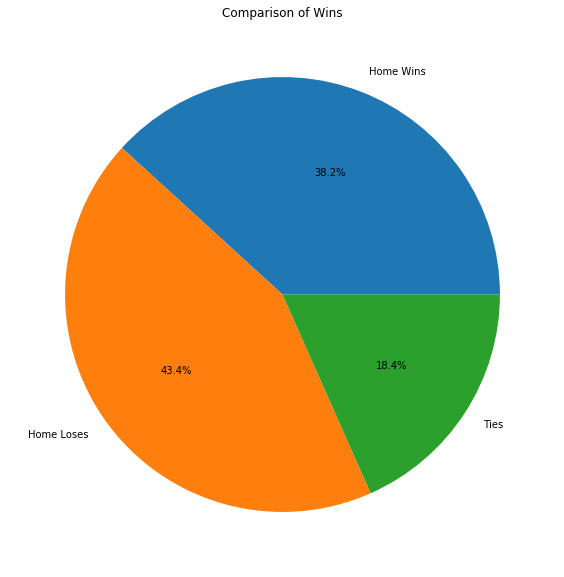

In [69]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.pie([home_wins,home_loses, ties],labels=['Home Wins','Home Loses','Ties'],autopct='%1.1f%%')
ax.set_title('Comparison of Wins')

#### We see a similar distribution and nothing has changed. There is a reason that might explain this: we have been assumiing wrong that team1 is the team that plays at home.

### What I did in this project
#### First I converted the date column to datetime format. Then I created a scatterplot that showed the median and mean of the scores separated by team1 and team2. During this whole process I always assumed that team1 is the one that plays at home and usually the team that plays at home is the one that wins. The graphs seemed to verify this as they showed that team 1 tends to score higher than team2. We obtained the average of all the games and separated them by team1 and team2, it also showed that the average for team1 was higher than for team2. Then we proceeded to calculate the percentage of games that were won by team1 and team2 and the graph showed that usually the home team loses. We assumed that this is probably cuz the list of games we used includes leagues that do not have such high quality games and that our assumption would be proved if we select a good league. Therefore, we selected the Premier League and created the graph again. However, the graph showed similar results disproving our theory that teams that play at home tend to win.

#### However, we had no data that told us where each game was being played. There is the possibility that several of the games were played in a location that wasn't home for any of the teams and this would add some noise to our graphs.